# HOW TO RETRIEVE AND USE VOLCANO DATA

# Multi-domain data

For data available through [Tilde](https://tilde.geonet.org.nz/ui/data-discovery), there are cases where data from one location are provided through more than one domain.

There are also cases where a user might want to work with data from [Tilde](https://tilde.geonet.org.nz/ui/data-discovery) together with data from a completely different source.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. More than one Tilde domain - lake temperature data
### 3. Tilde data and data from a different source - Volcanic Alert Level data and sulphur dioxide emissions
### 4. Tilde data and data from a different source - Ruapehu crater lake temperature data and historic volcanic activity

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#for querying data
import requests
import json

#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for getting CSV format data
from io import StringIO

#for system functions
import os

#for VAL and volcanic activity datetime functionality
import datetime as dt

### Set the source URL

Using [API data endpoint](https://tilde.geonet.org.nz/v4/api-docs/endpoint/data)

In [2]:
#API version 4 data endpoint
source = 'https://tilde.geonet.org.nz/v4/data/'

## &nbsp;2. More than one Tilde domain
## Basic data retrieval and graphing

We request lake temperature data from Inferno Crater using `enivirosensor` and `manualcollect` domains

**envirosensor**
- domain = `envirosensor`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-temperature`
  - sensorcode = `01`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-temperature/01/snapshot/-`

Date range:
  - startdate = `2023-05-01`
  - enddate = `2024-05-01`

Complete request
- `envirosensor/OT001/lake-temperature/01/snapshot/-/2023-05-01/2024-05-01`

In [3]:
url = source+'envirosensor/OT001/lake-temperature/01/snapshot/-/2023-05-01/2024-05-01'

We will now query the URL and ask for a CSV format to be returned. A 200 response code indicates everything went okay, and the result has been returned (if any).

In [4]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


To work with the observation data we will use python's [pandas module](https://pandas.pydata.org/). We will now store the response of our request in a pandas dataframe (`enviro`), using `pd.read_csv`. By using `parse_dates=['timestamp']` we can convert the 'timestamp' column to a datetime, which makes it easier to work with the data. We add `date_format='ISO8601'` to ensure that pandas uses the full `ISO 8601` datetime format we record our data in. Using `index_col`, we can set the date and time as the index of the dataframe. More information on `pd.read_csv` can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. We need to use the `StringIO` function with the text returned from our query. By printing the beginning of the result, with `enviro.head()`, we can see the first 5 lines of the dataframe from our query.

Once we have the data in the dataframe, we can begin to our analysis.

In [5]:
enviro = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
enviro.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2023-05-01 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,65.11,degC,0.0,degC,NaN
2023-05-01 00:10:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,65.01,degC,0.0,degC,NaN
2023-05-01 00:20:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,64.97,degC,0.0,degC,NaN
2023-05-01 00:30:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,64.91,degC,0.0,degC,NaN
2023-05-01 00:40:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,64.81,degC,0.0,degC,NaN


##### **manualcollect**
- domain = `manualcollect`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-temperature`
  - sensorcode = `MC01`, code for the specific sensor number
  - method (of data collection) = `thermocouple`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-temperature/MC01/thermocouple/-`

Date range:
  - startdate = `2023-01-01`
  - enddate = `2024-08-31`

Complete request
- `manualcollect/OT001/lake-temperature/MC01/thermocouple/-/2023-01-01/2024-08-31`

In [6]:
url = source+'manualcollect/OT001/lake-temperature/MC01/thermocouple/-/2023-01-01/2024-08-31'

In [7]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


In [8]:
mancol = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
mancol.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2023-05-12 00:00:00+00:00,manualcollect,OT001,lake-temperature,MC01,thermocouple,nil,50.7,degC,2.2,degC,NaN
2024-03-20 00:00:00+00:00,manualcollect,OT001,lake-temperature,MC01,thermocouple,nil,60.3,degC,0.0,degC,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of the lake temperature against time. The `envirosensor` data are plotted first, with the `manualcollect` data on top.

Text(0, 0.5, 'water temperature ($^o$C)')

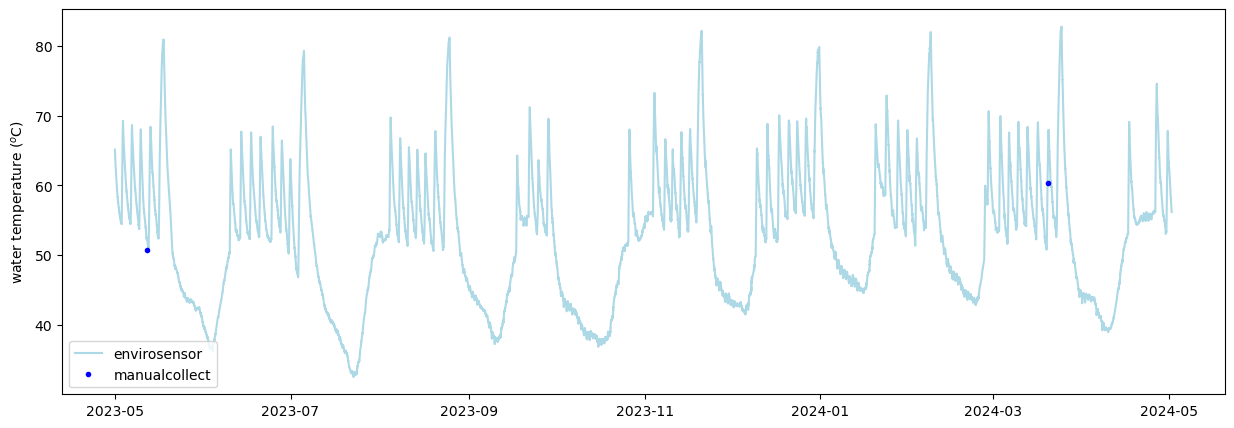

In [9]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(enviro.index, enviro['value'], color='lightblue', label='envirosensor')
ax.plot(mancol.index, mancol['value'], color='blue', marker='o', markersize=3, linestyle='none', label='manualcollect')
ax.legend(loc='lower left')
ax.set_ylabel('water temperature ($^o$C)')

## &nbsp;3. Tilde data and data from a different source - Volcanic Alert Level data and sulphur dioxide emissions
## Basic data retrieval and graphing

### Tilde
- domain = `manualcollect`

The specific parameters are:
  - station = `WI000`, the station code for Whalaari/White Island (the whole island, not a specific feature)
  - name (type of data) = `plume-SO2-gasflux`
  - sensorcode = `MC01`, code for the specific sensor number
  - method (of data collection) = `flyspec`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `WI000/plume-SO2-gasflux/MC01/flyspec/-`

Date range:
  - startdate = `2024-01-01`
  - enddate = `2024-09-15`

Complete request
- `manualcollect/WI000/plume-SO2-gasflux/MC01/flyspec/-/2024-01-01/2024-09-15`

In [10]:
url = source+'manualcollect/WI000/plume-SO2-gasflux/MC01/flyspec/-/2024-01-01/2024-09-15'

In [11]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


In [12]:
df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-01-23 23:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,4.0,kg/s,0.04,kg/s,NaN
2024-03-26 00:00:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,3.2,kg/s,0.23,kg/s,NaN
2024-03-26 12:00:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,3.2,kg/s,0.23,kg/s,NaN
2024-04-30 11:00:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,3.5,kg/s,0.34,kg/s,NaN
2024-05-26 23:30:00+00:00,manualcollect,WI000,plume-SO2-gasflux,MC01,flyspec,nil,8.6,kg/s,1.83,kg/s,NaN


### Volcanic Alert Level (VAL)

[VAL Data](https://doi.org/10.21420/we5s-1n52) are available from a [GitHub repository](https://github.com/GeoNet/data/tree/main/volcanic-alert-levels)

In [13]:
url = 'https://raw.githubusercontent.com/GeoNet/data/main/volcanic-alert-levels/'

In [14]:
valfile = url+'VAL_WhakaariWhiteIsland.csv'
val = pd.read_csv(valfile)

In [15]:
val.tail()

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
37,2024-05-23T22:45:00Z,2024-05-24T04:59:59Z,3,3,Minor volcanic eruption,2024-05-24 10:45:00 NZST,2024-05-24 16:59:59 NZST
38,2024-05-24T05:00:00Z,2024-05-24T23:44:59Z,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24T23:45:00Z,2024-05-29T02:59:59Z,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29T03:00:00Z,2024-08-09T04:59:59Z,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09T05:00:00Z,9999-01-01T00:00:00Z,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,9999-01-01 00:00:00 NZST


#### Make VAL period end time suitable for datetime

The VAL data use `9999-01-01T00:00:00Z` as the end time of the current VAL, as is standard GeoNet practice. But `9999-01-01T00:00:00Z` cannot be converted to a python datetime value, so we replace it with the current date/time. This applies to both UTC and LocalTime so users can use either time base.

In [16]:
nowutc = dt.datetime.now(dt.timezone.utc).strftime('%Y-%m-%dT%H:%M:%SZ')
nownzst = dt.datetime.now().strftime('%Y-%m-%d %H:%M:%S NZST')
val.replace(['9999-01-01T00:00:00Z', '9999-01-01 00:00:00 NZST'], [nowutc, nownzst], inplace=True)
val[['PeriodStart UTC','PeriodEnd UTC']] = val[['PeriodStart UTC','PeriodEnd UTC']].apply(lambda x: pd.to_datetime(x,format='ISO8601'))

In [17]:
val.tail()

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
37,2024-05-23 22:45:00+00:00,2024-05-24 04:59:59+00:00,3,3,Minor volcanic eruption,2024-05-24 10:45:00 NZST,2024-05-24 16:59:59 NZST
38,2024-05-24 05:00:00+00:00,2024-05-24 23:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24 23:45:00+00:00,2024-05-29 02:59:59+00:00,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29 03:00:00+00:00,2024-08-09 04:59:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09 05:00:00+00:00,2024-12-10 03:03:05+00:00,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,2024-12-10 16:03:05 NZST


#### Select 2024 VAL data to match data from Tilde

Select on VAL data where end data is after 2024-01-01.

In [18]:
start = dt.datetime(2024,1,1).replace(tzinfo=dt.timezone.utc)
val24 = val[val['PeriodEnd UTC']>start]

In [19]:
val24

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
36,2022-09-07 02:00:00+00:00,2024-05-23 22:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2022-09-07 14:00:00 NZST,2024-05-24 10:44:59 NZST
37,2024-05-23 22:45:00+00:00,2024-05-24 04:59:59+00:00,3,3,Minor volcanic eruption,2024-05-24 10:45:00 NZST,2024-05-24 16:59:59 NZST
38,2024-05-24 05:00:00+00:00,2024-05-24 23:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24 23:45:00+00:00,2024-05-29 02:59:59+00:00,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29 03:00:00+00:00,2024-08-09 04:59:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09 05:00:00+00:00,2024-12-10 03:03:05+00:00,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,2024-12-10 16:03:05 NZST


### Basic Data Plot
The data values are completely different so plot on two separate axes. VAL is plotted as a "steps".

As VAL is an interval, we have to plot `PeriodStart UTC` and `PeriodEnd UTC` to get the complete data, but with different steps.

Text(0, 0.5, 'Flyspec SO$_2$ flux (kg/s)')

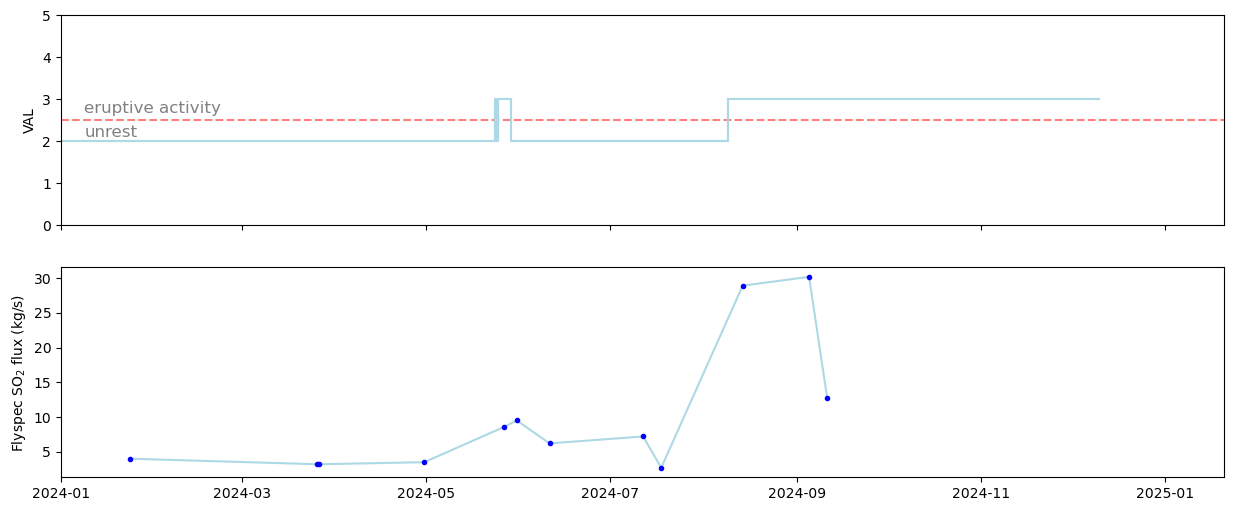

In [20]:
fig,(axv,axf) = plt.subplots(2,1,figsize=(15,6), sharex=True)

#mark transition between unrest and eruptive activity in VAL schema
axv.axhline(2.5, linestyle='--', color='red', alpha=0.5)
axv.text(0.02, 0.48, 'unrest', fontsize=12, color='grey', va='top', transform=axv.transAxes)
axv.text(0.02, 0.52, 'eruptive activity', fontsize=12, color='grey', va='bottom', transform=axv.transAxes)

axv.step(val24['PeriodStart UTC'],val24['VAL'], where='post', color='lightblue')
axv.step(val24['PeriodEnd UTC'],val24['VAL'], where='pre', color='lightblue')
axv.set_xlim(left=start)
axv.set_ylim(0,5)
axv.set_yticks(list(range(0,6)))
axv.set_ylabel('VAL')


axf.plot(df.index, df['value'], color='lightblue')
axf.plot(df.index, df['value'], marker='o', markersize=3, color='blue', linestyle='none')
axf.set_ylabel('Flyspec SO$_2$ flux (kg/s)')

## &nbsp;4. Tilde data and data from a different source - Ruapehu crater lake temperature data and historic volcanic activity
## Basic data retrieval and graphing

### Tilde
- domain = `manualcollect`

The specific parameters are:
  - station = `RU001`, the station code for Ruapehu Crater Lake
  - name (type of data) = `lake-temperature`
  - sensorcode = `MC01`, code for the specific sensor number
  - method (of data collection) = `-`, all methods
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `RU001/lake-temperature/MC01/-/-`

Date range:
- dates = `1950-01-01/2010-01-01`
  - startdate = `1950-01-01`
  - enddate = `2010-01-01`

Complete request
- `manualcollect/RU001/lake-temperature/MC01/-/-/1950-01-01/2010-01-01`

In [21]:
url = source+'manualcollect/RU001/lake-temperature/MC01/-/-/1950-01-01/2010-01-01'

In [22]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


In [23]:
df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
1992-01-03 00:00:00+00:00,manualcollect,RU001,lake-temperature,MC01,thermocouple,nil,22.1,degC,0.0,degC,NaN
1992-02-11 00:00:00+00:00,manualcollect,RU001,lake-temperature,MC01,thermocouple,nil,39.0,degC,0.0,degC,NaN
1992-03-24 00:00:00+00:00,manualcollect,RU001,lake-temperature,MC01,thermocouple,nil,31.5,degC,0.0,degC,NaN
1992-05-06 00:00:00+00:00,manualcollect,RU001,lake-temperature,MC01,thermocouple,nil,34.5,degC,0.0,degC,NaN
1992-07-17 00:00:00+00:00,manualcollect,RU001,lake-temperature,MC01,thermocouple,nil,17.0,degC,0.0,degC,NaN


#### Split lake temperature data by collection method

In [24]:
thermometer = df[df['method']=='thermometer']
thermocouple = df[df['method']=='thermocouple']

### Historic volcanic activity

[Historic volcanic activity Data](https://doi.org/10.21420/bw31-2x60) are available from a [GitHub repository](https://github.com/GeoNet/data/tree/main/historic-volcanic-activity). We access the Ruapehu data.

In [25]:
url = 'https://raw.githubusercontent.com/GeoNet/data/refs/heads/main/historic-volcanic-activity/historic_eruptive_activity_ruapehu.csv'
hist = pd.read_csv(url, parse_dates=['Date LocalTime'], date_format='ISO8601')

In [26]:
hist.tail()

,Date LocalTime,Date Comment,Activity Description,Activity Scale,Additional Details,References
526,1997-11-01,NaN,Minor phreatic eruptions,1,Confined to basin,NaN
527,1998-11-08,NaN,Small phreatic eruptions,1,Confined to basin,NaN
528,2006-10-04,NaN,Minor hydrothermal eruption,2,Confined to basin,NaN
529,2007-09-25,NaN,Moderate hydrothermal eruptions with lahars do...,4,Confined to summit plateau and Whangaehu valle...,NaN
530,2009-07-13,NaN,Phreatic activity,2,Small snow slurry lahars in upper Whangaehu,NaN


### Basic Data Plot
The data values are completely different so plot on two separate axes. Activity is plotted as a vertical lines. Set temperature x-axis limits to match temperature data, which has a shorter duration. As x-axes are shared, this forces both to have the same range.

Text(0, 0.5, 'Activity scale value')

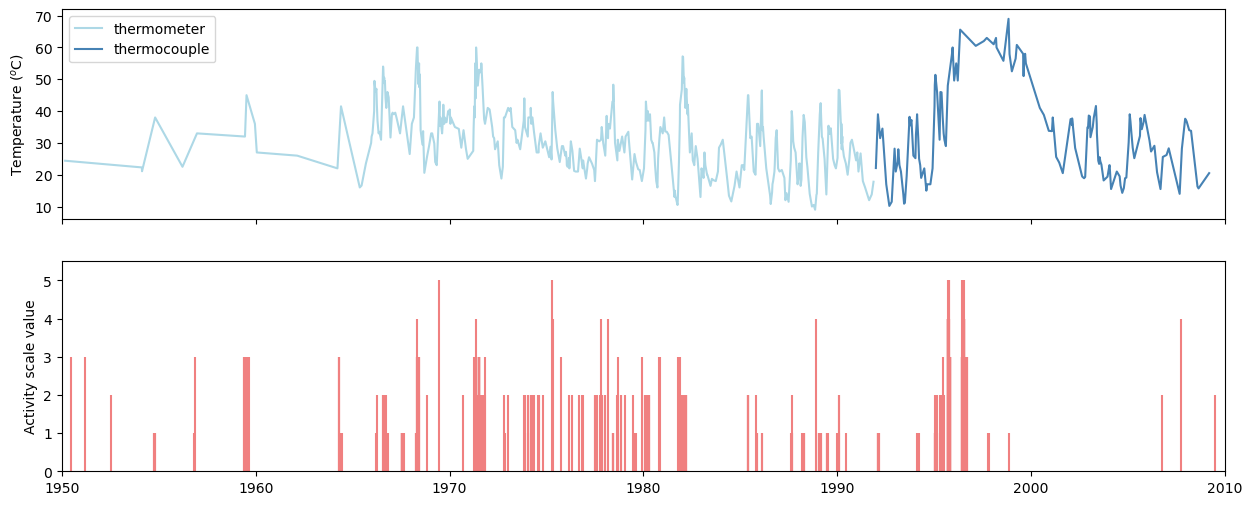

In [27]:
fig,(axt,axe) = plt.subplots(2,1,figsize=(15,6), sharex=True)

axt.set_xlim(left=dt.datetime(1950,1,1), right=dt.datetime(2010,1,1))

axt.plot(thermometer.index ,thermometer['value'], color='lightblue', label='thermometer')
axt.plot(thermocouple.index ,thermocouple['value'], color='steelblue', label='thermocouple')
axt.legend(loc='upper left')
axt.set_ylabel('Temperature ($^o$C)')

axe.vlines(hist['Date LocalTime'], ymin=0, ymax=hist['Activity Scale'], color='lightcoral')
axe.set_ylim(0,5.5)
axe.set_ylabel('Activity scale value')